In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json

### LOAD JSON INTO CSV

In [2]:
house_data_json = json.load(open('extracted_data.json', 'r'))
house_data = pd.DataFrame()
print(">> Dataset size:", len(house_data_json))

for house_info in house_data_json:
    house_info = pd.DataFrame(house_info, index=[0])
    house_data = pd.concat([house_data, house_info], ignore_index=True)

house_data.head()

>> Dataset size: 1500


,Diện tích,Diện tích_unit,Giá,Giá_unit,Mặt tiền,Mặt tiền_unit,Đường vào,Đường vào_unit,Số tầng,Số tầng_unit,Số phòng vệ sinh,Pháp lý,Hướng nhà,Hướng ban công
0,105.0,m,16.0,Tỷ,4.6,m,15.0,m,5.0,tầng,4,Sổ đỏ/ Sổ hồng,NaN,NaN
1,86.0,m,3.9,Tỷ,6.7,m,3.0,m,4.0,tầng,NaN,Sổ đỏ/ Sổ hồng,NaN,NaN
2,183.0,m,20.0,Tỷ,9.0,m,26.0,m,NaN,NaN,NaN,Sổ đỏ/ Sổ hồng,NaN,NaN
3,56.0,m,5.5,Tỷ,5.0,m,6.0,m,5.0,tầng,4,Sổ đỏ/ Sổ hồng,NaN,NaN
4,286.0,m,116.0,Tỷ,21.0,m,30.0,m,3.0,tầng,NaN,Sổ đỏ/ Sổ hồng,NaN,NaN


In [3]:
# Dataset size
house_data.shape

(1500, 14)

In [4]:
 # Details on columns in dataset: name, non-null count, data type
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Diện tích         1478 non-null   float64
 1   Diện tích_unit    1478 non-null   object 
 2   Giá               1428 non-null   object 
 3   Giá_unit          1427 non-null   object 
 4   Mặt tiền          1267 non-null   object 
 5   Mặt tiền_unit     1259 non-null   object 
 6   Đường vào         1474 non-null   float64
 7   Đường vào_unit    1474 non-null   object 
 8   Số tầng           1245 non-null   float64
 9   Số tầng_unit      1245 non-null   object 
 10  Số phòng vệ sinh  1123 non-null   object 
 11  Pháp lý           1499 non-null   object 
 12  Hướng nhà         174 non-null    object 
 13  Hướng ban công    174 non-null    object 
dtypes: float64(3), object(11)
memory usage: 164.2+ KB


In [5]:
# Number of unique values within each column
house_data.nunique()

Diện tích           168
Diện tích_unit        1
Giá                 228
Giá_unit              2
Mặt tiền             89
Mặt tiền_unit         1
Đường vào            34
Đường vào_unit        1
Số tầng              25
Số tầng_unit          1
Số phòng vệ sinh     29
Pháp lý               3
Hướng nhà             5
Hướng ban công        5
dtype: int64

In [6]:
# Unique values within each unit column
print(">> Diện tích:", house_data['Diện tích_unit'].unique().tolist())
print(">> Giá:", house_data['Giá_unit'].unique().tolist())
print(">> Mặt tiền:", house_data['Mặt tiền_unit'].unique().tolist())
print(">> Đường vào:", house_data['Đường vào_unit'].unique().tolist())
print(">> Số tầng:", house_data['Số tầng_unit'].unique().tolist())

>> Diện tích: ['m', nan]
>> Giá: ['Tỷ', nan, 'Triệu']
>> Mặt tiền: ['m', nan]
>> Đường vào: ['m', nan]
>> Số tầng: ['tầng', nan]


In [7]:
# Unique values within categorical columns
print(">> Pháp lý:", house_data['Pháp lý'].unique().tolist())
print(">> Hướng nhà:", house_data['Hướng nhà'].unique().tolist())
print(">> Hướng ban công:", house_data['Hướng ban công'].unique().tolist())

>> Pháp lý: ['Sổ đỏ/ Sổ hồng', 'Đang chờ sổ', 'Hợp đồng mua bán', nan]
>> Hướng nhà: [nan, 'KXĐ', 'Đông Nam', 'Nam', 'Tây', 'Tây Nam']
>> Hướng ban công: [nan, 'KXĐ', 'Nam', 'Đông Nam', 'Tây', 'Tây Nam']


>> Pháp lý: Pháp lý
Sổ đỏ/ Sổ hồng      1427
Đang chờ sổ           61
Hợp đồng mua bán      11
NaN                    1
Name: count, dtype: int64
>> Hướng nhà: Hướng nhà
NaN         1326
KXĐ          154
Đông Nam       7
Tây Nam        7
Nam            3
Tây            3
Name: count, dtype: int64
>> Hướng ban công: Hướng ban công
NaN         1326
KXĐ          163
Đông Nam       6
Nam            3
Tây            1
Tây Nam        1
Name: count, dtype: int64


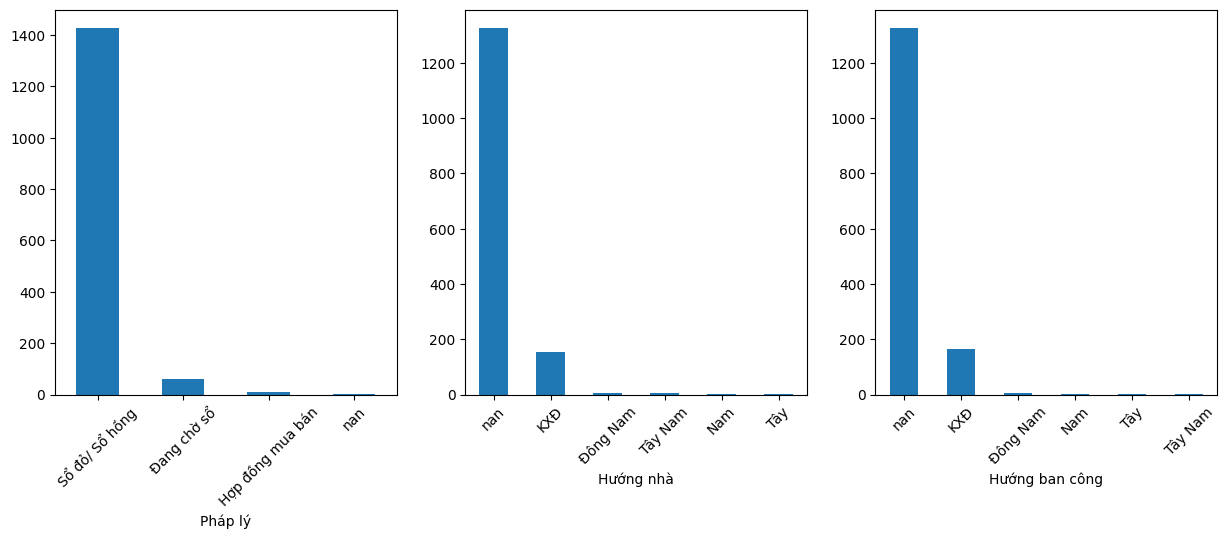

In [8]:
# Analyze distribution within categorical columns. including NaN counts.
print(">> Pháp lý:", house_data['Pháp lý'].value_counts(dropna=False))
print(">> Hướng nhà:", house_data['Hướng nhà'].value_counts(dropna=False))
print(">> Hướng ban công:", house_data['Hướng ban công'].value_counts(dropna=False))

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
house_data['Pháp lý'].value_counts(dropna=False).plot(kind='bar', ax=axes[0], rot=45)
house_data['Hướng nhà'].value_counts(dropna=False).plot(kind='bar', ax=axes[1], rot=45)
house_data['Hướng ban công'].value_counts(dropna=False).plot(kind='bar', ax=axes[2], rot=45)

plt.show()

### END EDA